# Test wiki for generating reports and analyzing data...

Tests
- NGC
- Socal Gas
- Airforce
- Calfire

Calculations
- fuel efficiency
- speed ratio
- pressure ratio
- inlet massflow
  - bm vs impeller
- pid control loop
- Variable summary
  - max, min, delta

In [18]:
# importing and summarizing df
import pandas as pd

# df description
df = pd.read_csv('Data/all_data.csv')
summary = df.describe()
correlation = df.corr()
cols = list(df.columns)
df.describe()

C:\Users\greyl\AppData\Local\Temp\ipykernel_12708\1100496282.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Unnamed: 0,DO_Air_Valve,DO_Fuel_Enable,DO_Fuel_Heater,DO_Igniter,DO_System_Enable,NI_F_LoadPin,NI_PF_FuelCell,NI_PF_OilInlet,NI_PF_WaterInlet,...,control_mode,diag,fuel_call,fuel_signal_ao,n1_max,n2_max,passive_kw,stage,target_n2,volt_max
count,69268.00000,23582.000000,23582.000000,23582.0,23582.000000,23582.000000,22104.000000,22104.000000,22104.000000,22104.000000,...,23582.0,23582.000000,23582.000000,23582.000000,23582.0,23582.000000,23582.000000,23582.000000,23582.0,23582.000000
mean,34633.50000,0.012934,0.084768,0.0,0.013909,0.119922,2.998507,-0.811799,46.075461,-8.674584,...,100.0,0.255110,1.800187,1.198753,10000.0,25.831354,0.401470,4.367314,0.0,66.662709
std,19996.09356,0.112991,0.278542,0.0,0.117115,0.324877,0.066909,1.741430,1.618533,0.555571,...,0.0,0.836015,5.384832,4.075001,0.0,1.861658,0.798827,13.307439,0.0,3.723315
min,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-7.000000,1.000000,-10.000000,...,100.0,0.000000,0.000000,0.000000,10000.0,25.000000,0.000000,0.000000,0.0,65.000000
25%,17316.75000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,-2.000000,46.000000,-9.000000,...,100.0,0.000000,0.000000,0.000000,10000.0,25.000000,0.010000,0.000000,0.0,65.000000
50%,34633.50000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,-1.000000,46.000000,-9.000000,...,100.0,0.000000,0.000000,0.000000,10000.0,25.000000,0.290000,0.000000,0.0,65.000000
75%,51950.25000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,-1.000000,46.000000,-8.000000,...,100.0,0.000000,0.000000,0.000000,10000.0,25.000000,0.400000,0.000000,0.0,65.000000
max,69267.00000,1.000000,1.000000,0.0,1.000000,1.000000,3.000000,9.000000,101.000000,2.000000,...,100.0,3.000000,30.000000,30.000000,10000.0,30.000000,7.700000,50.000000,0.0,75.000000


In [17]:
# correlation matrix
import plotly.express as px
fig = px.imshow(df.corr())
fig.show()

C:\Users\greyl\AppData\Local\Temp\ipykernel_12708\717153877.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(df.corr())


In [10]:
# removing data that doesn't change throughout test
lame_cols = []
for x in cols:
    if max(df[x]) == min(df[x]):
        print(x, 'is lame')

    # remove time, get total delta... decide from there
    if abs(max(df[x]) - min(df[x])) < 10:
        print(x, 'not change much')

ValueError: could not convert string to float: '2022-12-15 02:02:11.962333+00:00'

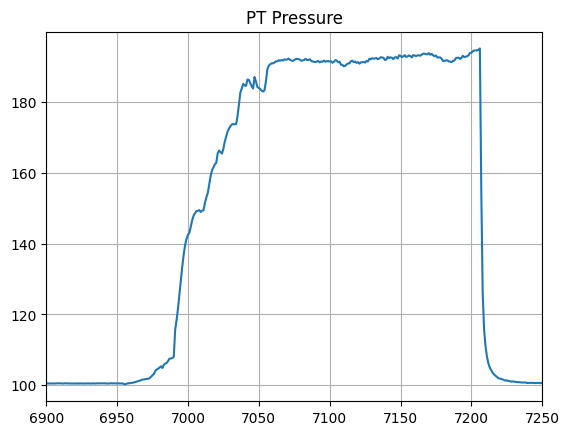

In [19]:
# plotting pt exit
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(df.index, df['PLC_PT_Exit_Flow_1'])
ax.set_title('PT Pressure')
ax.set_xlim([6900, 7250])
plt.grid()
plt.show()

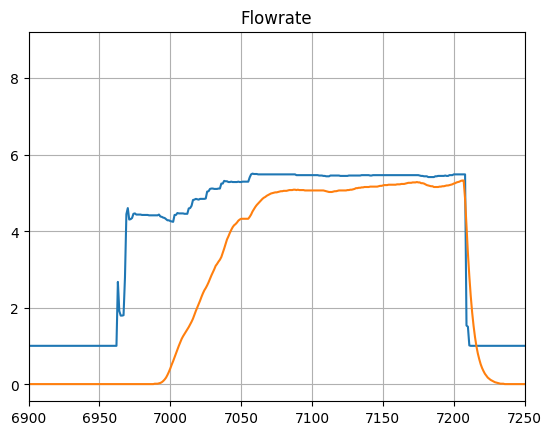

In [9]:
# plotting flowrate and power
fig, ax = plt.subplots()

ax.plot(df.index, df['PLC_VF_Fuel'])
ax.plot(df.index, df['passive_kw'])
ax.set_title('Flowrate and Power')
ax.set_xlim([6900, 7250])
plt.grid()
plt.show()

In [16]:
# creating generic calculations 

def fuel_eff(gpm, kW):
    # calculating kerosene fuel efficiency

    # calculating power from flowrate...
    gph = 4 # gal / hour

    # conversion
    k_pd = 40E3 # kJ/kg ...40 mJ
    k_rho = 800 # kg/m^3
    gal_to_m3 = 264 # gallons per m3

    # converting gph to kW...
    kg_per_s = ((gph / gal_to_m3) * k_rho) / 3600
    kW = kg_per_s * k_pd
    eff = (5/kW)*100
    print('efficiency%', eff)
fuel_eff(4.5, 5)

3.7125000000000004
